<a href="https://colab.research.google.com/github/foramkavathiya/Projects/blob/main/Movie_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import seaborn as sns

In [2]:
df = pd.read_csv('/content/netflix_titles.csv')

In [3]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [4]:
df.groupby('type').count()

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
type,,,,,,,,,,,
Movie,5377,5377,5214,4951,5147,5377,5377,5372,5377,5377,5377
TV Show,2410,2410,184,2118,2133,2400,2410,2408,2410,2410,2410


In [5]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [6]:
movies = df[df['type'] == 'Movie'].reset_index()

In [7]:
movies.head()

,index,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
1,2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
2,3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
3,4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
4,6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",2019,TV-MA,95 min,"Horror Movies, International Movies","After an awful accident, a couple admitted to ..."


In [8]:
tv = df[df['type'] == 'TV Show'].reset_index()

In [9]:
tv.head()

,index,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...
2,11,s12,TV Show,1983,NaN,"Robert Więckiewicz, Maciej Musiał, Michalina O...","Poland, United States","November 30, 2018",2018,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas","In this dark alt-history thriller, a naïve law..."
3,12,s13,TV Show,1994,Diego Enrique Osorno,NaN,Mexico,"May 17, 2019",2019,TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S...",Archival video and new interviews examine Mexi...
4,16,s17,TV Show,Feb-09,NaN,"Shahd El Yaseen, Shaila Sabt, Hala, Hanadi Al-...",NaN,"March 20, 2019",2018,TV-14,1 Season,"International TV Shows, TV Dramas","As a psychology professor faces Alzheimer's, h..."


In [10]:
x= df['type'].value_counts().reset_index()
fig = px.pie(x,values = 'type', names= 'index')
fig.update_traces(textposition = 'inside', textinfo = 'percent+label')

In [11]:
country_df = df['country'].value_counts().reset_index()
country_df = country_df[country_df['country']/ country_df['country'].sum() > 0.01]

fig = px.pie(country_df, values = 'country', names = 'index', color_discrete_sequence = px.colors.sequential.RdBu)
fig
fig.update_traces(textposition = 'inside', textinfo = 'percent+label')

In [12]:
net_date = tv[['date_added']].dropna()

In [13]:
net_date['year'] = net_date['date_added'].apply(lambda x: x.split(', ')[-1])
net_date['month'] = net_date['date_added'].apply(lambda x: x.lstrip().split(' ')[0])

In [14]:
net_date['month'].unique()

array(['August', 'July', 'November', 'May', 'March', 'January', 'April',
       'December', 'June', 'October', 'September', 'February'],
      dtype=object)

In [15]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'][::-1]

findfont: Font family ['calibri'] not found. Falling back to DejaVu Sans.


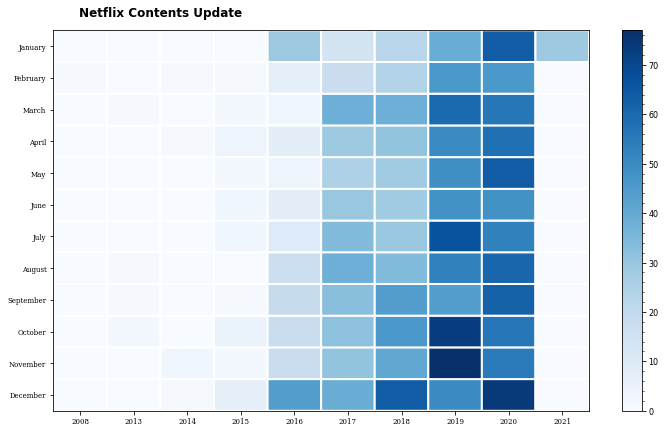

In [16]:
data = net_date.groupby('year')['month'].value_counts().unstack().fillna(0)[month_order].T
plt.figure(figsize = (12,7))
plt.pcolor(data, cmap = 'Blues', edgecolors = 'white', linewidth = 2)
plt.xticks(np.arange(0.5, len(data.columns), 1), data.columns, fontsize=7, fontfamily='serif')
plt.yticks(np.arange(0.5, len(data.index), 1), data.index, fontsize=7, fontfamily='serif')
plt.title('Netflix Contents Update', fontsize=12, fontfamily='calibri', fontweight='bold', position=(0.20, 1.0+0.02))
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize = 8)
cbar.ax.minorticks_on()

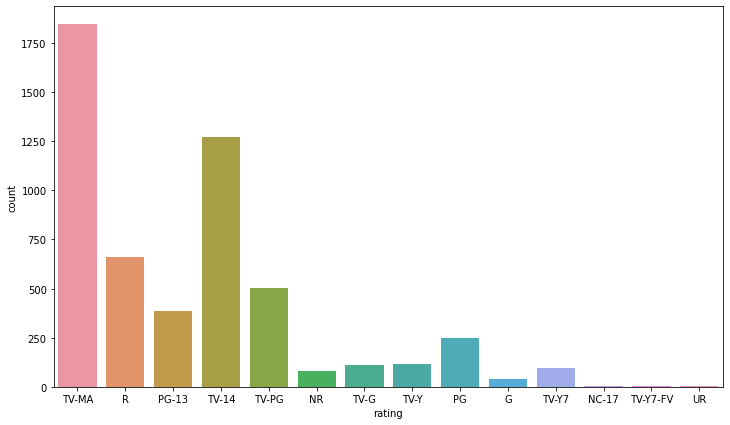

In [17]:
plt.figure(figsize = (12,7))
sns.countplot(x = 'rating', data= movies)

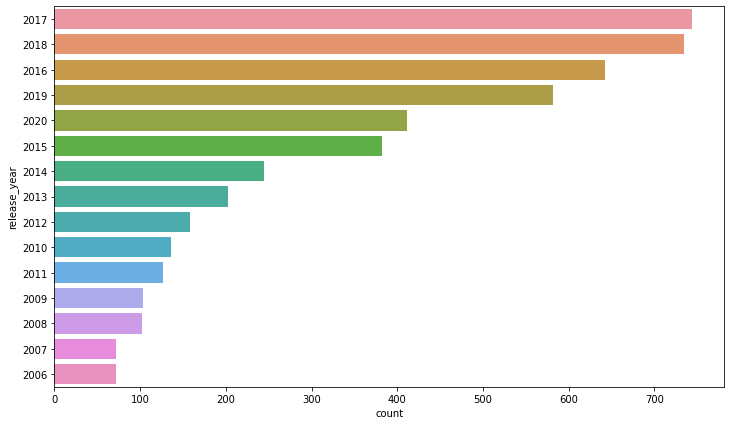

In [18]:
plt.figure(figsize = (12,7))
sns.countplot(y = 'release_year', data= movies, order = movies['release_year'].value_counts().index[0:15])

In [19]:
movies['duration'] = movies['duration'].str.replace('min', '')

In [20]:
movies['duration'] = movies['duration'].astype(str).astype(int)
movies['duration'] 

0        93
1        78
2        80
3       123
4        95
       ... 
5372     88
5373     99
5374    111
5375     44
5376     90
Name: duration, Length: 5377, dtype: int64

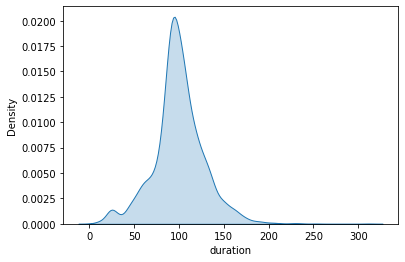

In [21]:
sns.kdeplot(data = movies['duration'], shade = True)

In [22]:
from collections import Counter

genres = list(movies['listed_in'])
gen = []

for i in genres:
    i = list(i.split(','))
    for j in i:
        gen.append(j.replace(' ', ""))
g = Counter(gen)

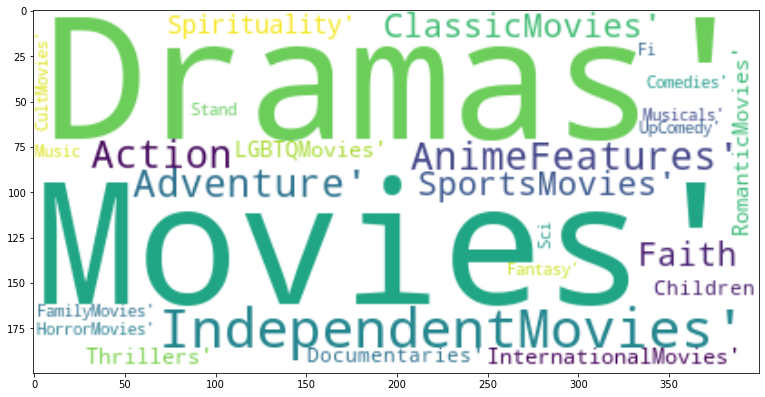

In [23]:
from wordcloud import WordCloud, STOPWORDS

text= list(set(gen))
plt.figure(figsize = (13,13))
wordcloud = WordCloud(max_words=1000000,background_color="white").generate(str(text))
plt.imshow(wordcloud,interpolation="bilinear")
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text major ticklabel objects>)

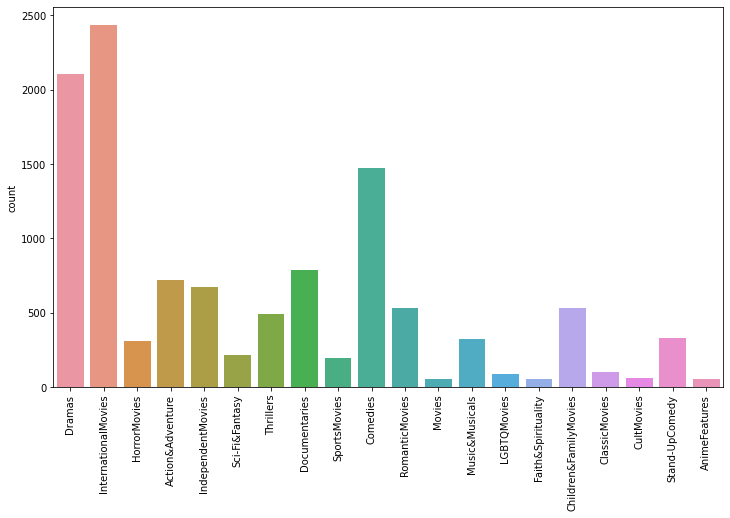

In [24]:
fig = plt.figure(figsize = (12,7))
g = sns.countplot(x = gen, data = movies)
plt.xticks(rotation=90)

In [25]:
features = ['title', 'duration']
durations = tv[features]

durations['no_of_seasons'] = durations['duration'].str.replace(' Season', '')
durations['no_of_seasons'] = durations['no_of_seasons'].str.replace('s', '')

durations['no_of_seasons']=durations['no_of_seasons'].astype(str).astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

In [26]:
t = ['title', 'no_of_seasons']
top = durations[t]

top = top.sort_values(by = 'no_of_seasons', ascending = False)

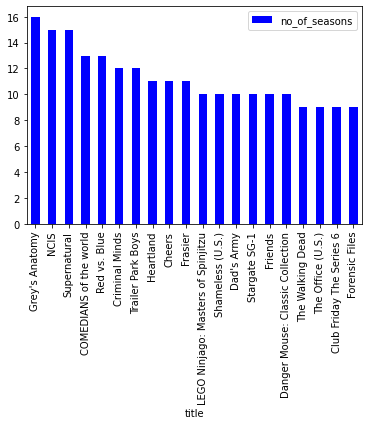

In [27]:
top20= top[0:20]
top20.plot(kind = 'bar', x='title',y='no_of_seasons', color = 'blue')

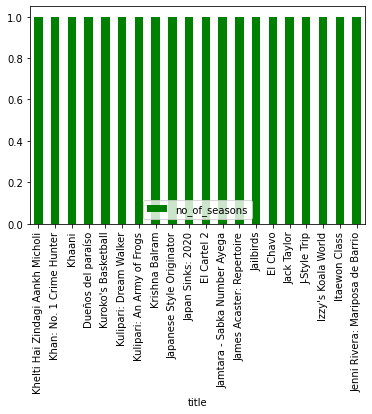

In [28]:
bottom = top.sort_values(by = 'no_of_seasons')
bottom20 = bottom[30:50]
bottom20.plot(kind = 'bar', x='title',y='no_of_seasons', color = 'green')

In [29]:
genres = list(tv['listed_in'])
gen = []

for i in genres:
    i = list(i.split(','))
    for j in i:
        gen.append(j.replace(' ', ''))
g = Counter(gen)

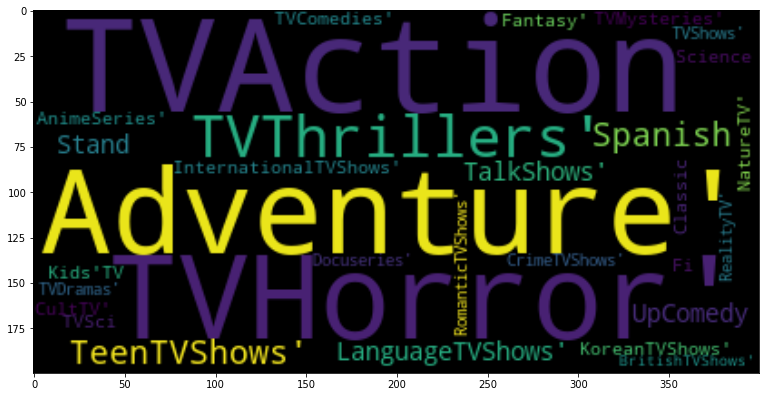

In [30]:
text = list(set(gen))
from wordcloud import WordCloud, STOPWORDS
wordcloud = WordCloud(max_words = 10000).generate(str(text))
plt.figure(figsize = (13,13))
plt.imshow(wordcloud,interpolation="bilinear")

In [31]:
us_series = tv[tv['country'] == 'United States']

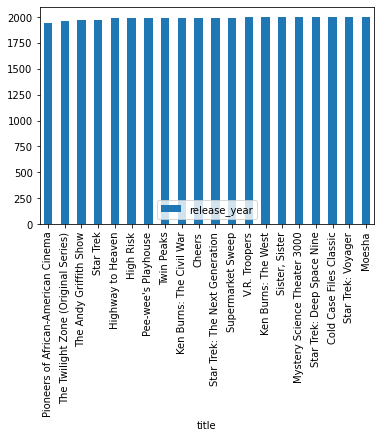

In [32]:
oldest_us_series = us_series.sort_values(by = 'release_year')[0:20]
oldest_us_series.plot(kind = 'bar', x = 'title', y='release_year')

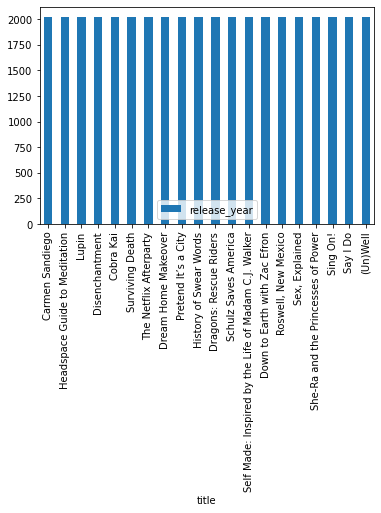

In [33]:
newest_us_series = us_series.sort_values(by = 'release_year', ascending = False)[0:20]
newest_us_series.plot(kind = 'bar', x = 'title', y='release_year')

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [35]:
tfidf = TfidfVectorizer(stop_words = 'english')

df['description'] = df['description'].fillna('')

tfidf_matrix = tfidf.fit_transform(df['description'])
tfidf_matrix.shape

(7787, 17905)

In [36]:
from sklearn.metrics.pairwise import linear_kernel

In [37]:
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [38]:
indices = pd.Series(df.index, index = df['title']).drop_duplicates()

In [39]:
def get_recommendations(title, cosine_sim=cosine_sim):
    idx = indices[title]

    sim_scores = list(enumerate(cosine_sim[idx]))

    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    sim_scores = sim_scores[1:11]

    movie_indices = [i[0] for i in sim_scores]

    return df['title'].iloc[movie_indices]

In [40]:
get_recommendations('Peaky Blinders')

4692                    Our Godfather
4358                   My Stupid Boss
1807                              Don
6344                         The Fear
3219    Jonathan Strange & Mr Norrell
4953                Power Rangers Zeo
6783                       The Prison
6950                       The Tudors
6236                    The Con Is On
6585     The Legend of Michael Mishra
Name: title, dtype: object

In [41]:
get_recommendations('Friends')

3904         Manhattan Romance
1025           BoJack Horseman
2015                  Episodes
5860                 Studio 54
1577                Dad's Army
7169         Trailer Park Boys
5629      Single Ladies Senior
4034                    Menahi
6549    The Larva Island Movie
7482                Warehoused
Name: title, dtype: object